In [0]:
# 런타임끊김방지
function ClickConnect() { 
    // 백엔드를 할당하지 못했습니다. 
    // GPU이(가) 있는 백엔드를 사용할 수 없습니다. 가속기가 없는 런타임을 사용하시겠습니까? 
    // 취소 버튼을 찾아서 클릭 
    var buttons = document.querySelectorAll("colab-dialog.yes-no-dialog paper-button#cancel"); 
    buttons.forEach(function(btn) { 
        btn.click(); 
    }); console.log("1분마다 자동 재연결"); 
    document.querySelector("#top-toolbar > colab-connect-button").click(); 
} 
setInterval(ClickConnect,1000*60);


In [1]:
# colab에 구글 드라이브 mount하기
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# 텐서플로,케라스 cpu, gpu 선택을 위해 지원되는 디바이스 넘버 보기
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12087738375513225222, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4287283323619081829
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8030726021481481290
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8106882362209898800
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [0]:
# clear_output() 으로 반복문에서 길~게 나오는 로그들을 매 루프마다 지우고 새로 출력하게 한다
from IPython.display import clear_output 

# InteractiveShell 옵션에 'all'을 주면 주피터노트북의 각 셀에서 가장 마지막 줄 뿐만 아니라, 출력하도록 한 모든 값이 출력됨
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 경고가 너무 많이뜨는경우 주피터가 죽기때문에 경고메세지는 무시하도록 설정
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

# Matplotlib을 시각화 모듈로 사용하지만, plot의 기본 스타일은 seaborn의 스타일을 따르도록 한다
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

# pandas 데이터프레임이 너무 긴~경우 가로, 세로 몇 줄까지 보여줄 것인지 설정
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)


In [4]:
# colab에서의 한글 폰트 설정

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


# # matplotlib 모듈에 한글폰트 적용
# from matplotlib import font_manager, rc
# font_name = 'AppleGothic'
# rc('font', family=font_name)

# # matplotlib에서 한글 사용 시, 마이너스 기호의 폰트가 깨지는 문제를 해결하는 설정
# mpl.rcParams['axes.unicode_minus'] = False

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144467 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [0]:
import os

def getImageFromPath(path):
    x_dir_ls = []
    img_file = []
    y_list = []
    # count = 0

    for root, dirs, files in os.walk(path):
        for fname in files:
            full_fname = os.path.join(root, fname)
            # print(full_fname)
            x_dir_ls.append(full_fname)
            img_file.append(fname)
            y_list.append(fname.split("_")[0]) # 웹툰 제목을 y값인 라벨로 설정함(Y값은 파일명의 _앞에 위치한 웹툰 이름임)
            # count += 1 
            # if count == 2716:
            #   break

    # clear_output()        
    print("All image path listing complete!")
    return x_dir_ls, img_file, y_list # 각 이미지들의 경로, 이미지 파일명, y값 리스트 

# 실행예시
# path = 'D:/0_webtoon_imgs/test_dir_2'
# x_dir_ls, img_file, y_list = getImageFromPath(path)

In [0]:
# 이미지 numpy배열화
from PIL import Image as pil

def imageToNpArray(img_path_ls, w, h, img_mode): # 이미지 path가 리스트로 있어야 가능함
    X_RGBimgs = []
    graytoneimgs = []
    print("이미지 처리중...")

    for i in range(0, len(img_path_ls)):

        # 미니사이즈로 학습시켜보기 resize로 이미지 크기를 축소시켜서 사용할거임
        a = pil.open(img_path_ls[i]).resize((w,h), pil.ANTIALIAS).convert(mode=img_mode)
        
        k = np.asarray(a, dtype="uint8")
        
        X_RGBimgs.append(k)
        if i % 150 == 0:
            print(i, "/", len(img_path_ls), " ==> ", y_list[i], img_path_ls[i], k.shape, "completed", end='\r')
    plt.figure(figsize=(5,5))
    plt.imshow(a)
    plt.title("◆ 마지막으로 받은 이미지 예시")
    clear_output()
    plt.show()

    X_raw = np.asarray(X_RGBimgs)
    X_raw = X_raw.astype('float32')/255.0         # 실수값을 0에서 1 사이값으로 변환시켜주는 역할
    
    print("◆ 이미지 np.array화 완료!", w, "*", h, "--")
    print("이미지 데이터 형태▽")
    print(X_raw.shape, X_raw.dtype)
    
    return  X_raw, graytoneimgs

In [7]:
import tensorflow as tf
# from keras.backend.tensorflow_backend import set_session

config = tf.compat.v1.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True       # 메모리가 더 필요한 경우 자동 증폭
config.gpu_options.per_process_gpu_memory_fraction = 1.0      # keras의 gpu 메모리 점유율 설정

tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



In [9]:
# 옮긴 폴더 내부 파일 수량 확인
base_dir = '/content/drive/My Drive/Colab Notebooks/'
dst_dir = os.path.join(base_dir, 'naver_33')
naver_33 = os.listdir(dst_dir)
len(naver_33)

11682

In [10]:
path = '/content/drive/My Drive/Colab Notebooks/naver_33'
x_dir_ls, img_file, y_list = getImageFromPath(path)

All image path listing complete!


In [11]:
print("카테고리 갯수:", len(set(y_list)), ", x_dir갯수:", len(x_dir_ls), ", img_file 갯수:", len(img_file))

카테고리 갯수: 33 , x_dir갯수: 11682 , img_file 갯수: 11682


In [0]:
# 라벨을 그림 작가명으로 한다
changed_y_list = []

for title in y_list:
  drawing_author = title.split(",")[1].strip()
  splited = drawing_author.split("&")
  if len(splited) == 1:
    drawing_author = drawing_author
  else:
    drawing_author = splited[1].strip()
  
  changed_y_list.append(drawing_author)

y_list = changed_y_list

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


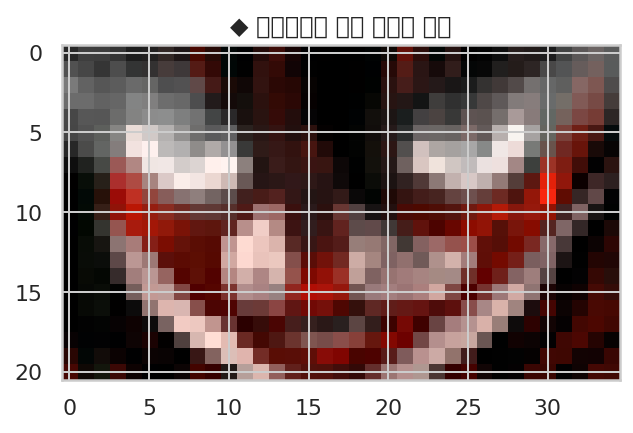

◆ 이미지 np.array화 완료! 35 * 21 --
이미지 데이터 형태▽
(11682, 21, 35, 3) float32
총 소요시간 :  98.73200523455938


In [0]:
# img사이즈 35x21
# import time

# start_time = time.time()

# #이미지 path 리스트, 가로px, 세로px, 이미지 모드
# w, h = 35, 21
# X_raw, error_imgs = imageToNpArray(x_dir_ls, w, h, "RGB") 

# print("총 소요시간 : ", (time.time() - start_time) / 60)

In [0]:
# 35x21, 11682개 불러오기
import numpy as np
loaded_array = np.load('/content/drive/My Drive/Colab Notebooks/4D_naver_12_nparray(35x21)_11682.npy')
X_raw = loaded_array
w, h = 35, 21

In [14]:
len(X_raw), len(loaded_array)

(11682, 11682)

In [15]:
print('Y데이터형태')
num_cat = len(set(y_list))
print("갯수:",len(y_list),"// 카테고리", num_cat)

Y데이터형태
갯수: 11682 // 카테고리 33


In [16]:
# y_list 라벨데이터(string) ->  숫자 라벨로 바꾸기 
# 이후에 다시 이 숫자를 그에 대응하는 라벨(string)로 변환시키는 메소드를 사용 할 수 있다 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = y_list
le.fit(y)
y = le.transform(y)
y, len(set(y_list))

LabelEncoder()

(array([13, 13, 13, ...,  8,  8, 24]), 33)

In [17]:
# 인덱스가 클래명과 대응한다
for i in range(len(set(y_list))):
  print(i+1, le.inverse_transform([i]))

1 ['232']
2 ['SIU']
3 ['강호진']
4 ['고일권']
5 ['구동인']
6 ['기안84']
7 ['김성민']
8 ['김세훈']
9 ['김인호']
10 ['랑또']
11 ['마인드C']
12 ['박용제']
13 ['박태준']
14 ['빤쓰']
15 ['사다함']
16 ['삭']
17 ['상아']
18 ['상하']
19 ['영파카']
20 ['윤현석']
21 ['이동건']
22 ['이상규']
23 ['이채은']
24 ['장래혁']
25 ['장태산']
26 ['전선욱']
27 ['조석']
28 ['조용석']
29 ['촌장']
30 ['최병열']
31 ['카레곰']
32 ['쿠당탕']
33 ['호패']


In [18]:
# 트레인 / 테스트데이터 나누기
# X, y train으로 X, y validation 나누기
# to_categorical 함수로 원 핫 인코딩해서 각 라벨들을 벡터로 만든다

from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.02, random_state=0)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.02, random_state=0)

num_cat = len(set(y_list)) # 카테고리 개수
Y_train = np_utils.to_categorical(y_train, num_cat) 
Y_test = np_utils.to_categorical(y_test, num_cat)
Y_validation = np_utils.to_categorical(y_validation, num_cat)

Using TensorFlow backend.


In [19]:
len(X_train), len(X_test), len(X_validation), len(y_train), len(y_test), len(y_validation)

(11219, 234, 229, 11219, 234, 229)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
import time


start_time = time.time()
# 오그멘테이션 자료 set 만들기
print('Using Full Set augmented data')
train_generator = ImageDataGenerator(
    zoom_range=0.05,         # 이미지 확대
    rotation_range=10,       # 이미지 각도가 바뀜
    width_shift_range=0.05,  # 이미지 넓이가 바뀜
    height_shift_range=0.05, # 이미지 높이가 바뀜
    fill_mode='nearest',     # 이미지를 회전, 이동, 축소할 때 생기는 공간을 채우는 방식
    horizontal_flip=True)    # 이미지 좌우가 바뀜

train_generator.fit(X_train)

train_iterator = train_generator.flow(X_train, Y_train, batch_size=len(X_train))

#오그멘테이션 할 배수
N = 50
print("total augmentation : ", N)

X_train_new = []
Y_train_new = []
for i in range(N):
    print("generating...", i, end="... ")
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    print("1/2..",end=" ")
    Y_train_new.append(y_train_new)
    print("ok!!")
    
X_train_new = np.vstack(X_train_new)
Y_train_new = np.vstack(Y_train_new)

clear_output()
print("All data are Generated!!", end="\n")
X_train_new.shape
print("총 소요시간 : ", (time.time() - start_time) / 60)

All data are Generated!!


(560950, 21, 35, 3)

총 소요시간 :  4.4029067317644754


In [0]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
import time

# 지정이 필요한 변수 : filter, dropout, epoch, batch_size, trial_no, 

EPOCH = 400
BATCH_SIZE = 768
trial_no = 18
conv_layer = 8

filter_num1 = 64
filter_num2 = 96
filter_num3 = 128
filter_num4 = 256
filter_num5 = 256

dropout_rate1 = 0.5 # 0.2
dropout_rate2 = 0.5 # 0.3
dropout_rate3 = 0.5 # 0.4
dropout_rate4 = 0.5 # 0.4
dropout_rate5 = 0.8 # 0.5

dence = 768

filter_ = [f'{filter_num1}', f'{filter_num2}', f'{filter_num3}', 
           f'{filter_num4}', f'{filter_num5}']
dropout_rate_ = [f'{dropout_rate1}', f'{dropout_rate2}', f'{dropout_rate3}', 
                 f'{dropout_rate4}', f'{dropout_rate5}']
dence_ = [f'{dence}', f'{dence}', f'{dence}', f'{dence}']

hist = []
history = []
score = []
test_score = []

start_time = time.time()

np.random.seed(0)

model = Sequential()

model.add(Conv2D(filter_num1, kernel_size=(3, 3), activation='relu', input_shape=(h, w, 3), padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num1, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())             # pool_size=(2, 2), strides=None
model.add(Dropout(dropout_rate1))               # 0.2, 0.2

model.add(Conv2D(filter_num2, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num2, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())             # pool_size=(2, 2), strides=None
model.add(Dropout(dropout_rate2))               # 0.2, 0.3

model.add(Conv2D(filter_num3, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num3, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())             # pool_size=(2, 2), strides=None
model.add(Dropout(dropout_rate3))               # 0.2, 0.4

model.add(Conv2D(filter_num4, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num4, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())             # pool_size=(2, 2), strides=None
model.add(Dropout(dropout_rate4))               # 0.2, 0.4

model.add(Flatten())
model.add(Dense(dence, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(dropout_rate5))
model.add(Dense(dence, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(dropout_rate5))              
model.add(Dense(dence, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(dropout_rate5)) 
model.add(Dense(dence, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(dropout_rate5)) 

model.add(Dense(num_cat, activation='softmax'))
    
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
model.summary()

# 모델 저장
MODEL_SAVE_FOLDER_PATH = '/content/drive/My Drive/Colab Notebooks/model_checkpoint/'
model_path = MODEL_SAVE_FOLDER_PATH + 'checkpoint-epoch-{}-batch-{}-trial-{}.h5'.format(EPOCH, BATCH_SIZE, trial_no)
cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

hist = model.fit(X_train_new, Y_train_new, epochs=EPOCH, batch_size=BATCH_SIZE, 
                    validation_data=(X_validation, Y_validation), verbose=1, callbacks=[cb_checkpoint])
history.append(hist.history)
score = model.evaluate(X_test, Y_test, verbose=0)

# 개선사항이 없다면 종료
# 모니터 기준 설정 (val loss)
# 10회 Epoch동안 개선되지 않는다면 종료
# earlystopping = EarlyStopping(monitor='val_loss', patience=10,)

test_score.append({'test_loss': score[0], 'test_accuracy': score[1]})

# 케라스 모델 저장
# /content/drive/My Drive/Colab Notebooks/model_checkpoint/checkpoint-epoch-{}-batch-{}-trial-{}.h5
model.save(f'{model_path}.h5') 

model_save_folder_path = f'/content/drive/My Drive/Colab Notebooks/model_history_save_{trial_no}'
np.save(model_save_folder_path + '/history', history)
np.save(model_save_folder_path + '/test_score', test_score)

print()
print('저장 완료')

print()
print("총 소요시간 : ", (time.time() - start_time) / 60)
print()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 21, 35, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 35, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 35, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 17, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 17, 96)        55392     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 17, 96)       

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


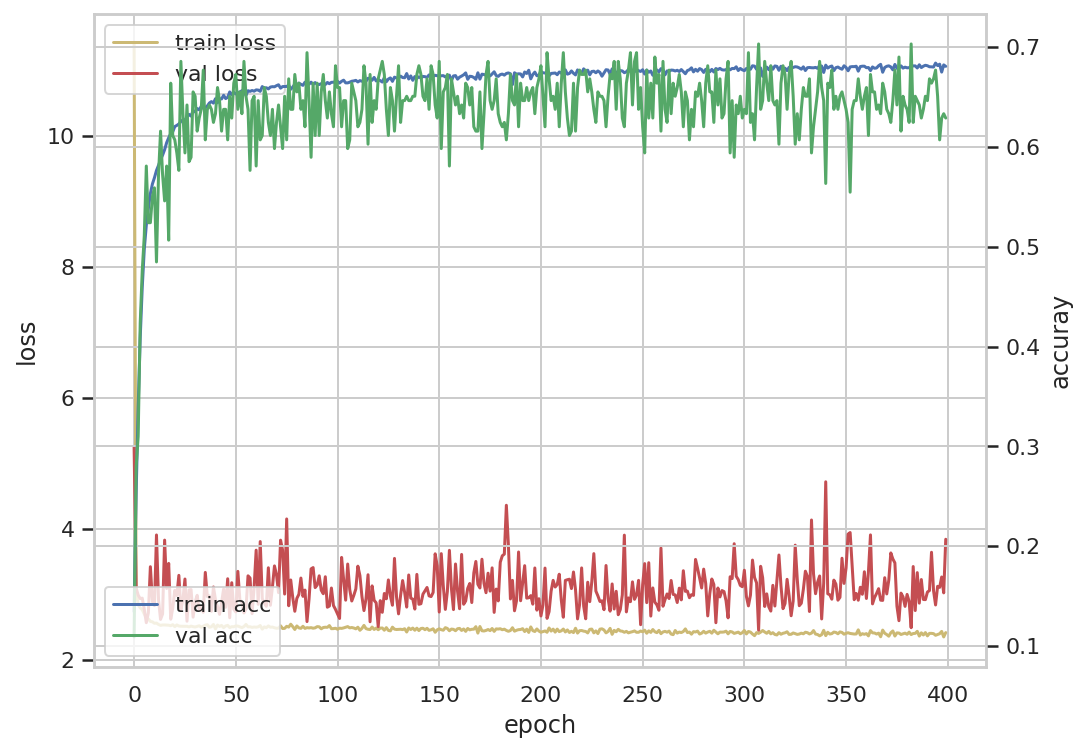

test_loss : 5.274124936160878 , test_accuracy : 0.5769230723381042

test no : 18 , image size :  35 21
augmentation : 50 , 학습 이미지 갯수 : 560950 개
filter no : ['64', '96', '128', '256', '256']
epoch : 400
layer : 8
batch_size : 768
dropout_rate:  ['0.5', '0.5', '0.5', '0.5', '0.8']
dence : ['768', '768', '768', '768']


In [0]:
# 모델의 학습 과정 나타내기

%matplotlib inline
import matplotlib.pyplot as plt

history = history[0]
score = test_score

fig, loss_ax = plt.subplots(figsize=(8, 6))

acc_ax = loss_ax.twinx()

loss_ax.plot(history['loss'], 'y', label='train loss')
loss_ax.plot(history['val_loss'], 'r', label='val loss')

acc_ax.plot(history['accuracy'], 'b', label='train acc')
acc_ax.plot(history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

clear_output()
plt.show()

print('test_loss :', score[0]['test_loss'], ', test_accuracy :', score[0]['test_accuracy'])
print()
print('test no :', trial_no, ', image size : ', w, h)
print('augmentation :', N, ', 학습 이미지 갯수 :', len(X_train_new), '개')
print('filter no :', filter_)
print('epoch :', EPOCH)
print('layer :', conv_layer)
print('batch_size :', BATCH_SIZE)
print('dropout_rate: ', dropout_rate_)
print('dence :', dence_)

**모델 사용하여 predict**

In [0]:
# model 불러오기
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/model_checkpoint/checkpoint-epoch-400-batch-768-trial-18.h5.h5')

In [64]:
# 테스트 이미지 불러오기
test_path = '/content/drive/My Drive/Colab Notebooks/test_img/'
v_dir_ls, v_img_file, v_list = getImageFromPath(test_path)

All image path listing complete!


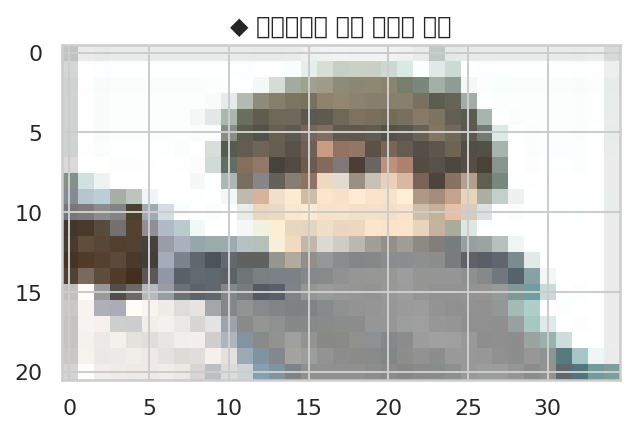

◆ 이미지 np.array화 완료! 35 * 21 --
이미지 데이터 형태▽
(7, 21, 35, 3) float32


In [65]:
# 이미지 path 리스트, 가로px, 세로px, 이미지 모드
V_raw = imageToNpArray(v_dir_ls, 35, 21,"RGB")

In [66]:
# 이미지를 분류 모델에 넣어 probability 확인
y_pred = model.predict(V_raw, verbose=1)
label_Y = le.inverse_transform(y_test)
result_df = pd.DataFrame()
result_df['id'] = v_img_file
result_df = pd.concat([result_df, pd.DataFrame(y_pred)], axis=1)

clear_output()
# result_df.tail(10)
# y_test.size
y_pred.shape
print('id목록\n', result_df.id.unique())

(7, 33)

id목록
 ['풍검_1화, 김철현.png' '아비무쌍, 이현석.png'
 '풍검, 김철현.png' '금수친구들_프롤로그, 짤태식.png'
 '경이로운 소문_프롤로그, 장이.png'
 '나혼자만레벨업, 장성락.png' '달빛조각사, 남희성.png']


In [84]:
result_df

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,"풍검_1화, 김철현.png",1.661096e-03,0.008944,2.501942e-02,1.702385e-01,8.643235e-03,2.010082e-04,7.348448e-05,0.008978,0.000465,0.001765,0.005124,9.749876e-04,1.583900e-05,3.320262e-04,8.580685e-04,7.137715e-01,0.001395,4.259351e-06,5.110653e-03,0.001440,0.005317,2.232082e-03,8.122077e-05,0.011594,1.036622e-03,8.058839e-07,0.009588,6.700200e-04,2.595906e-04,1.130321e-02,2.594850e-03,1.834503e-04,1.232251e-04
1,"아비무쌍, 이현석.png",7.708553e-04,0.000305,2.580793e-06,1.756845e-05,3.897483e-03,5.980115e-07,7.059606e-08,0.002876,0.006768,0.001026,0.000013,5.284430e-04,6.433075e-10,1.390219e-07,4.424016e-06,1.458379e-07,0.000056,1.379604e-04,9.748880e-01,0.000017,0.003170,1.644911e-11,4.098132e-09,0.003488,1.120942e-05,5.240883e-08,0.000006,4.403854e-09,5.532979e-10,9.623733e-08,9.304076e-05,1.922392e-03,1.416174e-07
2,"풍검, 김철현.png",8.581641e-17,0.000031,1.500440e-07,5.429958e-11,1.525255e-07,7.491076e-15,1.159300e-18,0.001201,0.000095,0.000050,0.931092,1.116290e-07,9.844547e-10,4.753164e-06,1.961842e-08,6.912676e-13,0.000022,3.698969e-23,7.015491e-11,0.000004,0.000036,6.684503e-02,7.613222e-06,0.000006,4.999540e-17,5.416235e-17,0.000579,2.693531e-05,2.321831e-08,1.085085e-11,2.775602e-10,2.138186e-13,7.974939e-15
3,"금수친구들_프롤로그, 짤태식.png",1.704212e-06,0.032875,9.277076e-03,8.238256e-05,5.514592e-03,2.172955e-05,2.225821e-06,0.034005,0.002451,0.004141,0.095253,6.114626e-03,6.586420e-04,1.645777e-02,1.836787e-03,1.075607e-04,0.005578,3.888444e-08,1.729816e-04,0.008591,0.009371,6.978249e-01,7.252031e-03,0.012811,1.706778e-06,5.055489e-06,0.018555,2.636331e-02,3.518407e-03,1.722327e-04,8.691169e-04,2.920502e-05,8.602157e-05
4,"경이로운 소문_프롤로그, 장이.png",2.926388e-08,0.019691,1.497739e-02,6.539937e-09,2.292428e-03,2.049693e-03,7.640171e-06,0.015606,0.005146,0.000130,0.013995,6.548826e-03,6.438758e-04,7.957386e-01,1.984835e-04,4.090243e-11,0.000532,2.454325e-07,2.936563e-05,0.000849,0.013448,9.395408e-03,3.645391e-03,0.008825,4.355001e-07,1.005649e-03,0.031110,4.444606e-02,7.795473e-03,1.441687e-05,1.257792e-06,1.650522e-03,2.263012e-04
5,"나혼자만레벨업, 장성락.png",4.094654e-08,0.013338,8.844007e-04,5.991052e-06,1.160886e-03,1.462917e-07,1.724104e-08,0.025937,0.001340,0.004411,0.213010,1.018621e-03,6.044197e-05,2.042160e-03,5.776868e-04,4.909384e-06,0.004502,8.335956e-11,1.427348e-05,0.004800,0.002553,6.978698e-01,3.168402e-03,0.003931,2.433176e-08,4.221081e-08,0.009341,9.336275e-03,4.577049e-04,8.733538e-06,2.238712e-04,5.691306e-07,2.031834e-06
6,"달빛조각사, 남희성.png",9.253239e-04,0.182084,6.677753e-02,5.597799e-04,9.740632e-02,7.311409e-03,3.701412e-03,0.074801,0.005047,0.005224,0.012827,3.258231e-02,8.526593e-03,4.869495e-02,2.277065e-02,7.330541e-04,0.016521,6.110870e-04,7.487406e-03,0.036578,0.036920,6.318712e-02,6.659355e-03,0.102913,3.656265e-04,3.062450e-03,0.026317,6.807494e-02,2.765838e-02,1.144870e-02,7.966851e-03,4.223880e-03,1.003342e-02


In [67]:
for index, value in enumerate(le.classes_):
  print(index, value)

0 232
1 SIU
2 강호진
3 고일권
4 구동인
5 기안84
6 김성민
7 김세훈
8 김인호
9 랑또
10 마인드C
11 박용제
12 박태준
13 빤쓰
14 사다함
15 삭
16 상아
17 상하
18 영파카
19 윤현석
20 이동건
21 이상규
22 이채은
23 장래혁
24 장태산
25 전선욱
26 조석
27 조용석
28 촌장
29 최병열
30 카레곰
31 쿠당탕
32 호패


In [89]:
V_raw[0].shape

(7, 21, 35, 3)

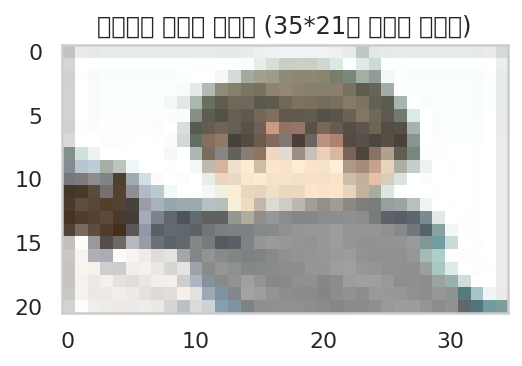

In [173]:
# 직접 눈으로 비교할 label숫자 설정

find_i = 6
# X_test
test_img = V_raw[0][find_i] # 6번째 이미지
test_img = test_img
# test_img
real_id = result_df.id[find_i]
# real_id

plt.figure(figsize=(4, 6))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = f'테스트로 사용한 이미지 (35*21로 조정된 이미지)'
plt.title(info2)
clear_output()
plt.show()

In [174]:
# 가장 비슷한 확률값을 가진 웹툰의 이미지 아무거나 10개 가져오기
finded = result_df.iloc[find_i, 1:]
temp = pd.DataFrame()
temp["id"] = le.inverse_transform(list(finded.index))
temp["proba"] = finded
top10_df = temp.sort_values('proba', ascending=False).head(10)
top10_df

,id,proba
1,SIU,0.182084
23,장래혁,0.102913
4,구동인,0.0974063
7,김세훈,0.0748006
27,조용석,0.0680749
2,강호진,0.0667775
21,이상규,0.0631871
13,빤쓰,0.048695
20,이동건,0.0369204
19,윤현석,0.0365781


In [175]:
# top10에 해당하는 작가의 웹툰 이미지 경로 아무거나 하나씩 가져오기

import re

top10_path_list = []
# drawing_author_list = []

for idx, row in top10_df.iterrows():  
  drawing_author = row['id']
  regex = re.compile('.{0,}' + drawing_author + '.{0,}')

  x_dir_ls = list(set(x_dir_ls))
  for each_dir in x_dir_ls:
    matched_path = regex.findall(each_dir)
    if len(matched_path) != 0:
      break
  top10_path_list.append(matched_path[0])
  
top10_path_list

['/content/drive/My Drive/Colab Notebooks/naver_33/신의 탑, SIU_2부 334화.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/신의 언어, 장래혁_123화 재앙 (2).png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/에이머, 구동인_시즌2 108화 Santa in my H(9).png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/열렙전사, 김세훈_137화.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/윈드브레이커, 조용석_37화.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/호랭총각, 강호진_5부 호 권 - 1. 노 예.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/호랑이형님, 이상규_22화 알 수 없는 힘.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/히어로메이커, 빤쓰_마음2.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/유미의 세포들컷툰, 이동건_251화 너무 좋아서 컨트롤이 안돼.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/다이스(DICE), 윤현석_STAGE 22  Pandora(6).png']

In [176]:
testls = x_dir_ls[:10]
testls

['/content/drive/My Drive/Colab Notebooks/naver_33/쿠베라, 카레곰_3부 39화 비틀어진 새 (6).png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/평범한 8반, 영파카_2장 21화_ 맘에 드나봐.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/패밀리 사이즈, 남지은&김인호_시즌2 163화.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/프리드로우, 전선욱_제230화 재익이의 첫 연애 (2).png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/호랑이형님, 이상규_22화 알 수 없는 힘.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/몽홀, 장태산_제 18화 떠버리 칼과 활 쏘는 늑대 - 1.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/몽홀, 장태산_제 14화 반격 - 12.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/마법스크롤 상인 지오, 엄재경&호패_시즌3 14화 Gone Girl 3..png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/평범한 8반, 영파카_4장 26화_오월(3).png',
 '/content/drive/My Drive/Colab Notebooks/nave

In [177]:
import random
random.shuffle(testls)
testls

['/content/drive/My Drive/Colab Notebooks/naver_33/쿠베라, 카레곰_3부 39화 비틀어진 새 (6).png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/호랑이형님, 이상규_22화 알 수 없는 힘.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/평범한 8반, 영파카_2장 21화_ 맘에 드나봐.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/프리드로우, 전선욱_제230화 재익이의 첫 연애 (2).png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/마법스크롤 상인 지오, 엄재경&호패_시즌3 14화 Gone Girl 3..png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/평범한 8반, 영파카_4장 26화_오월(3).png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/몽홀, 장태산_제 14화 반격 - 12.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/패밀리 사이즈, 남지은&김인호_시즌2 163화.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/몽홀, 장태산_제 18화 떠버리 칼과 활 쏘는 늑대 - 1.png',
 '/content/drive/My Drive/Colab Notebooks/nave

In [178]:
# top10에 해당하는 작가의 웹툰 이미지 경로 아무거나 하나씩 가져오기

import re
import random

first_10 = []
# top10_path_list[0].split(',')[0]
# drawing_author_list = []

# for idx, row in top10_df.iterrows():  
# drawing_author = row['id'][0]
# drawing_author
regex = re.compile(top10_path_list[0].split(',')[0] + '.{0,}')

random.shuffle(x_dir_ls)
for each_dir in x_dir_ls:
    matched_path = regex.findall(each_dir)
    if len(matched_path) != 0:
        # print(matched_path)
        first_10.append(matched_path[0])
        if len(first_10) > 10:
            break
# first_10.append(matched_path[0])
first_10

['/content/drive/My Drive/Colab Notebooks/naver_33/신의 탑, SIU_2부 271화.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/신의 탑, SIU_2부 101화.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/신의 탑, SIU_2부 156화.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/신의 탑, SIU_2부 207화.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/신의 탑, SIU_2부 28화.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/신의 탑, SIU_2부 144화.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/신의 탑, SIU_2부 4화.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/신의 탑, SIU_12화.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/신의 탑, SIU_3부 1화.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/신의 탑, SIU_3부 19화.png',
 '/content/drive/My Drive/Colab Notebooks/naver_33/신의 탑, SIU_2부 12화.png']

In [179]:
title_list = []
for each_path in top10_path_list[:9]:
  title_with_author = each_path[len('/content/drive/My Drive/Colab Notebooks/naver_33'):].split("_")[0]
  title_list.append(title_with_author)
title_list

['/신의 탑, SIU',
 '/신의 언어, 장래혁',
 '/에이머, 구동인',
 '/열렙전사, 김세훈',
 '/윈드브레이커, 조용석',
 '/호랭총각, 강호진',
 '/호랑이형님, 이상규',
 '/히어로메이커, 빤쓰',
 '/유미의 세포들컷툰, 이동건']

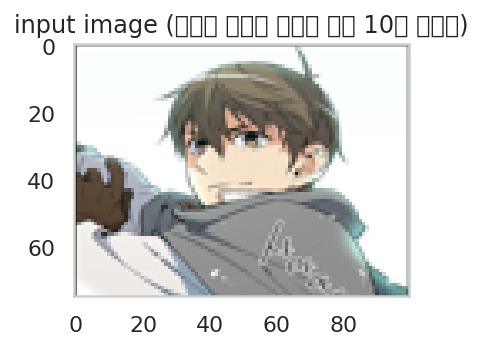

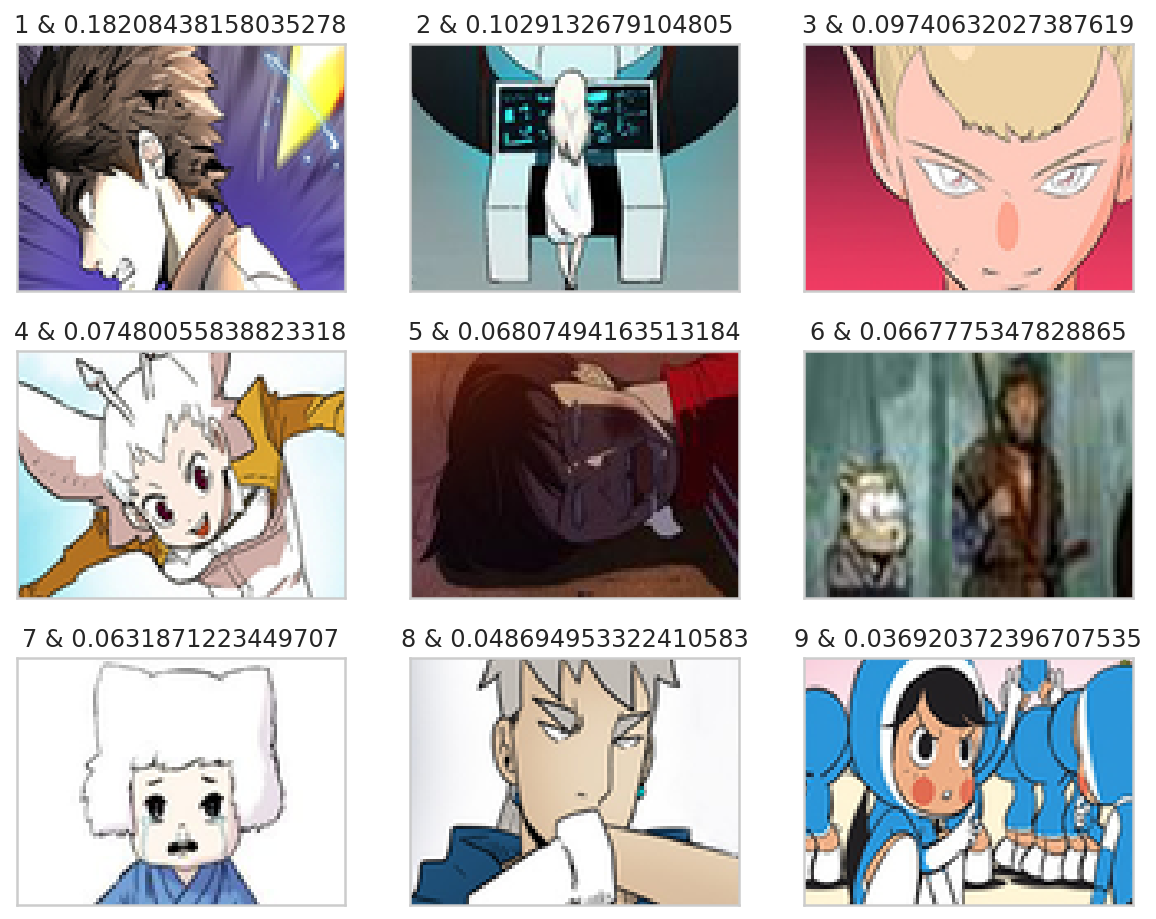

In [180]:
# proba기준 유사한 상위 10개 웹툰 나열
# X_test
test_img = pil.open(v_dir_ls[find_i]).resize((100,75))
# real_id
real_id = result_df.id[find_i]

plt.figure(figsize=(3, 3))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = 'input image (아래는 이거랑 비슷한 상위 10개 이미지)'
plt.title(info2)

i = 0
top10_proba = list(top10_df['proba'])

plt.figure(figsize=(10,8))
for each_path in top10_path_list[:9]:   
  plt.subplot(3, 3, i + 1)  
  picture = pil.open(each_path).resize((100,75), pil.ANTIALIAS)
  plt.imshow(picture)
  plt.grid(False)
  info = str(title_list[i])
  plt.title(f'{i+1} & {top10_proba[i]}')
  plt.xticks([])
  plt.yticks([])
  i += 1
clear_output()
plt.show()

In [181]:
first_10[0].split('/')[-1].split('_')[0]

'신의 탑, SIU'

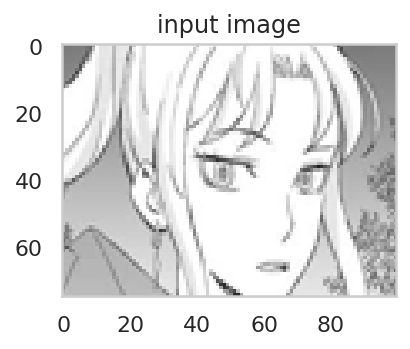

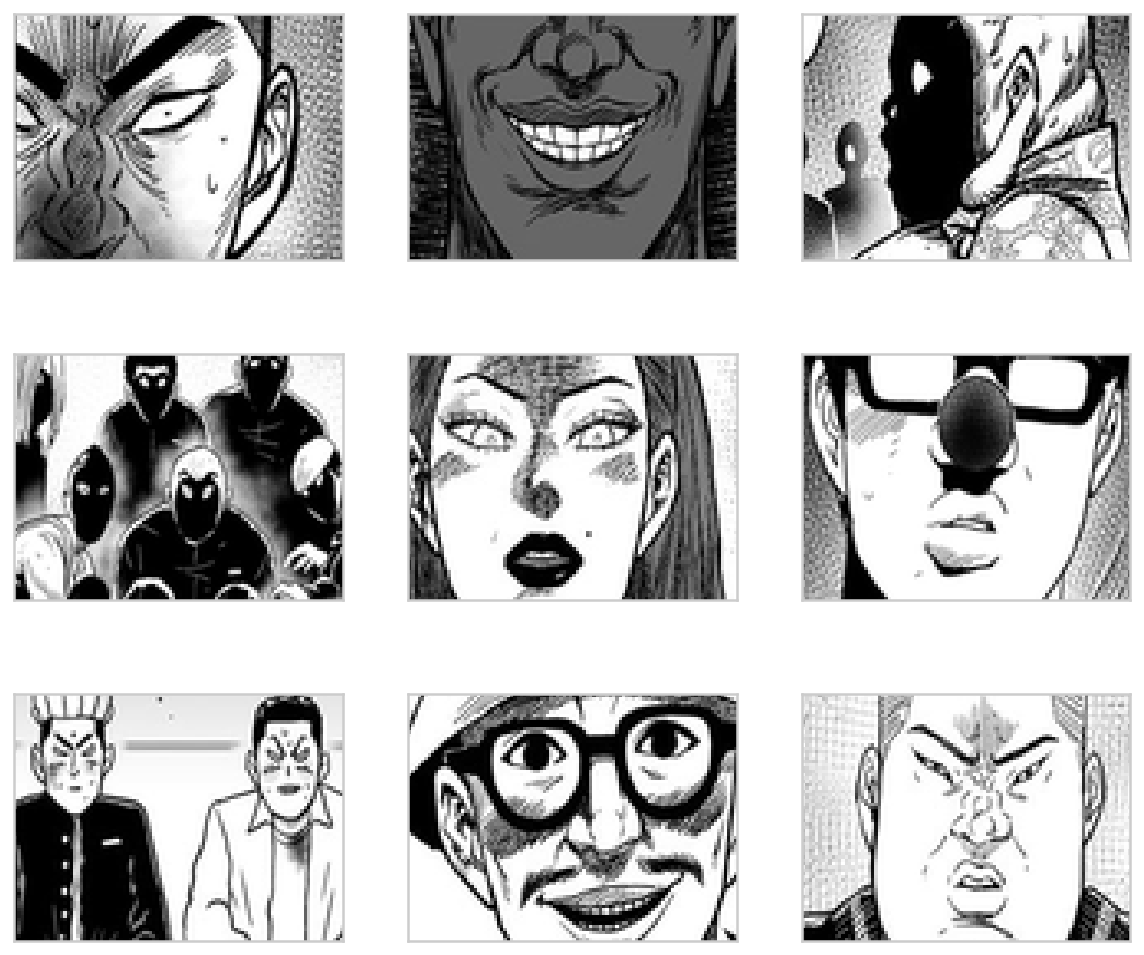

헬퍼 2 : 킬베로스, 삭


In [122]:
# 1번째 이미지 proba기준 1위 웹툰 이미지 10개 가져오기------------

# 비교용으로 넣은 테스트 이미지 
# X_test
test_img = pil.open(v_dir_ls[find_i]).resize((100,75))

real_id = result_df.id[find_i]
# real_id

plt.figure(figsize=(3, 3))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = 'input image'
plt.title(info2)
clear_output()
# plt.show()

i = 0

plt.figure(figsize=(10,12))
for each_path in first_10[:9]:   
  # fig = plt.figure()
  plt.subplot(4, 3, i + 1)  
  picture = pil.open(each_path).resize((100,75), pil.ANTIALIAS)
  plt.imshow(picture)
  plt.grid(False)
  # plt.subplots_adjust(hspace=0.4, wspace=0.2)
  plt.xticks([])
  plt.yticks([])
  i += 1

clear_output()

plt.show()
print(first_10[0].split('/')[-1].split('_')[0])

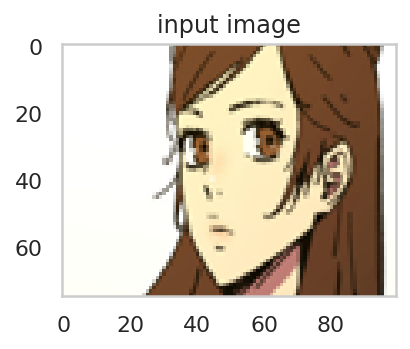

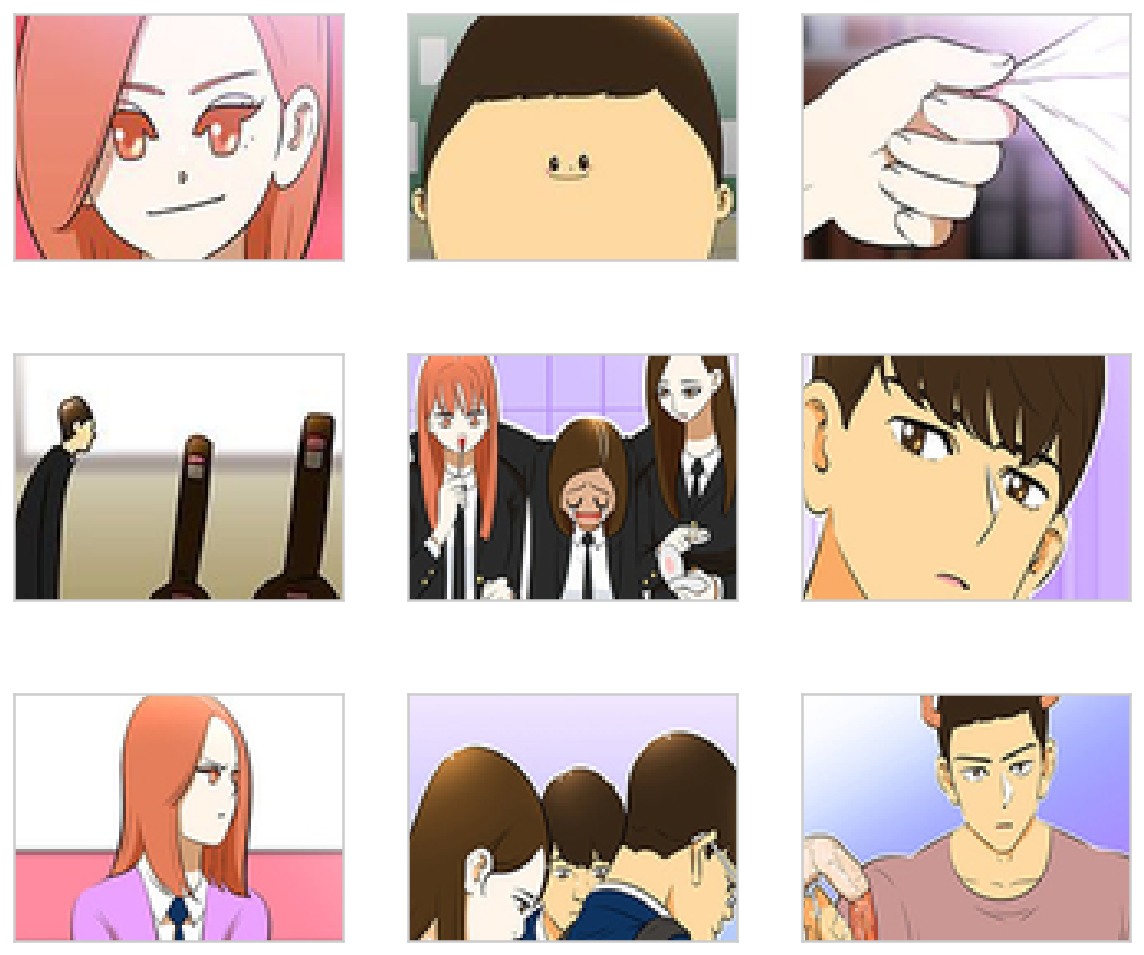

평범한 8반, 영파카


In [132]:
# 2번째 이미지 proba기준 1위 웹툰 이미지 10개 가져오기------------

# 비교용으로 넣은 테스트 이미지 
# X_test
test_img = pil.open(v_dir_ls[find_i]).resize((100,75))

real_id = result_df.id[find_i]
# real_id

plt.figure(figsize=(3, 3))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = 'input image'
plt.title(info2)
clear_output()
# plt.show()

i = 0

plt.figure(figsize=(10,12))
for each_path in first_10[:9]:   
  # fig = plt.figure()
  plt.subplot(4, 3, i + 1)  
  picture = pil.open(each_path).resize((100,75), pil.ANTIALIAS)
  plt.imshow(picture)
  plt.grid(False)
  # plt.subplots_adjust(hspace=0.4, wspace=0.2)
  plt.xticks([])
  plt.yticks([])
  i += 1

clear_output()

plt.show()
print(first_10[0].split('/')[-1].split('_')[0])

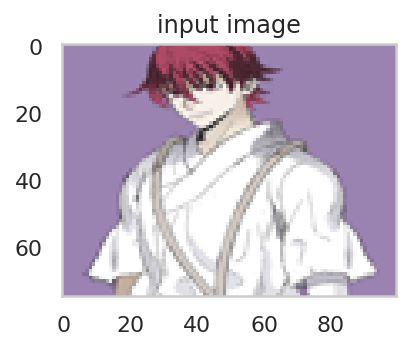

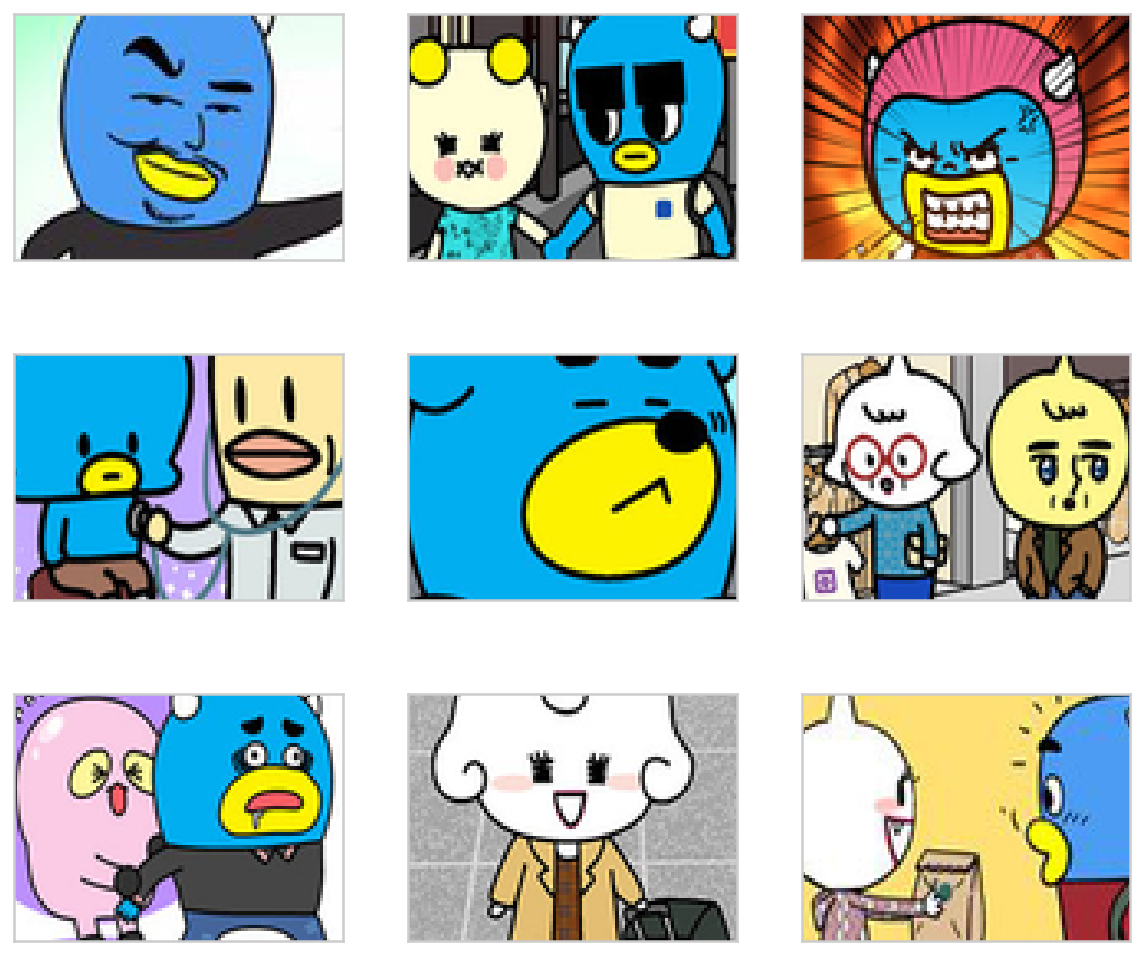

윌유메리미, 마인드C


In [142]:
# 3번째 이미지 proba기준 1위 웹툰 이미지 10개 가져오기------------

# 비교용으로 넣은 테스트 이미지 
# X_test
test_img = pil.open(v_dir_ls[find_i]).resize((100,75))

real_id = result_df.id[find_i]
# real_id

plt.figure(figsize=(3, 3))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = 'input image'
plt.title(info2)
clear_output()
# plt.show()

i = 0

plt.figure(figsize=(10,12))
for each_path in first_10[:9]:   
  # fig = plt.figure()
  plt.subplot(4, 3, i + 1)  
  picture = pil.open(each_path).resize((100,75), pil.ANTIALIAS)
  plt.imshow(picture)
  plt.grid(False)
  # plt.subplots_adjust(hspace=0.4, wspace=0.2)
  plt.xticks([])
  plt.yticks([])
  i += 1

clear_output()

plt.show()
print(first_10[0].split('/')[-1].split('_')[0])

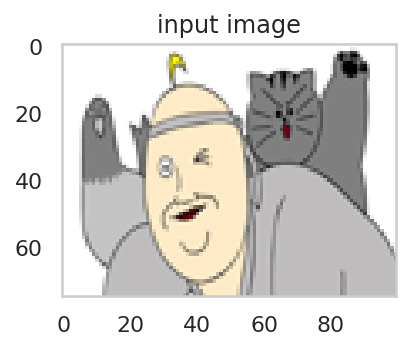

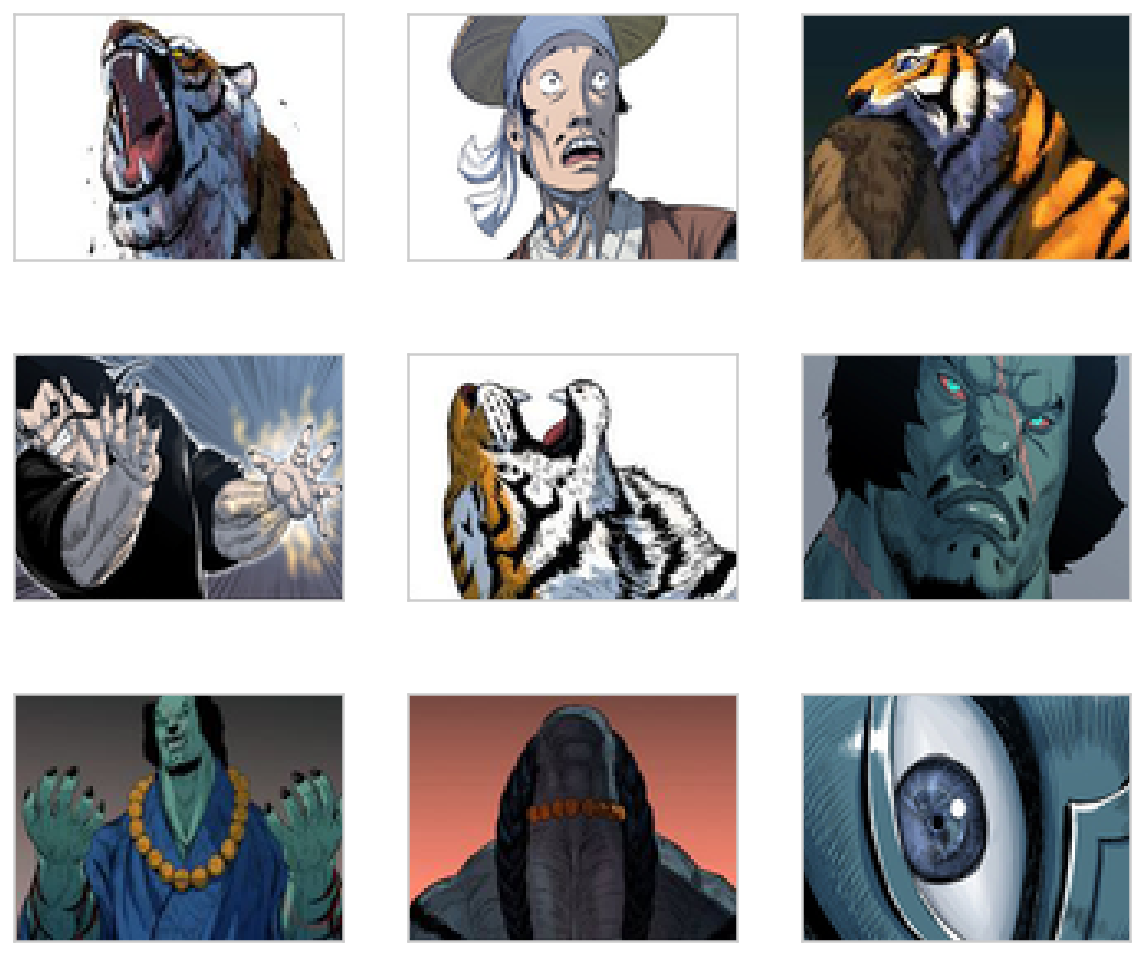

호랑이형님, 이상규


In [152]:
# 4번째 이미지 proba기준 1위 웹툰 이미지 10개 가져오기------------

# 비교용으로 넣은 테스트 이미지 
# X_test
test_img = pil.open(v_dir_ls[find_i]).resize((100,75))

real_id = result_df.id[find_i]
# real_id

plt.figure(figsize=(3, 3))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = 'input image'
plt.title(info2)
clear_output()
# plt.show()

i = 0

plt.figure(figsize=(10,12))
for each_path in first_10[:9]:   
  # fig = plt.figure()
  plt.subplot(4, 3, i + 1)  
  picture = pil.open(each_path).resize((100,75), pil.ANTIALIAS)
  plt.imshow(picture)
  plt.grid(False)
  # plt.subplots_adjust(hspace=0.4, wspace=0.2)
  plt.xticks([])
  plt.yticks([])
  i += 1

clear_output()

plt.show()
print(first_10[0].split('/')[-1].split('_')[0])

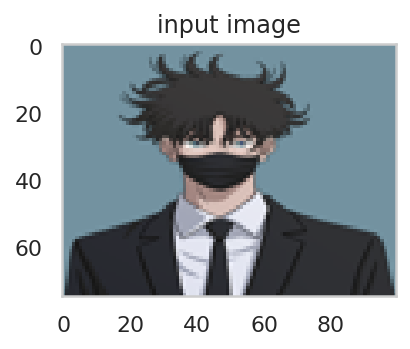

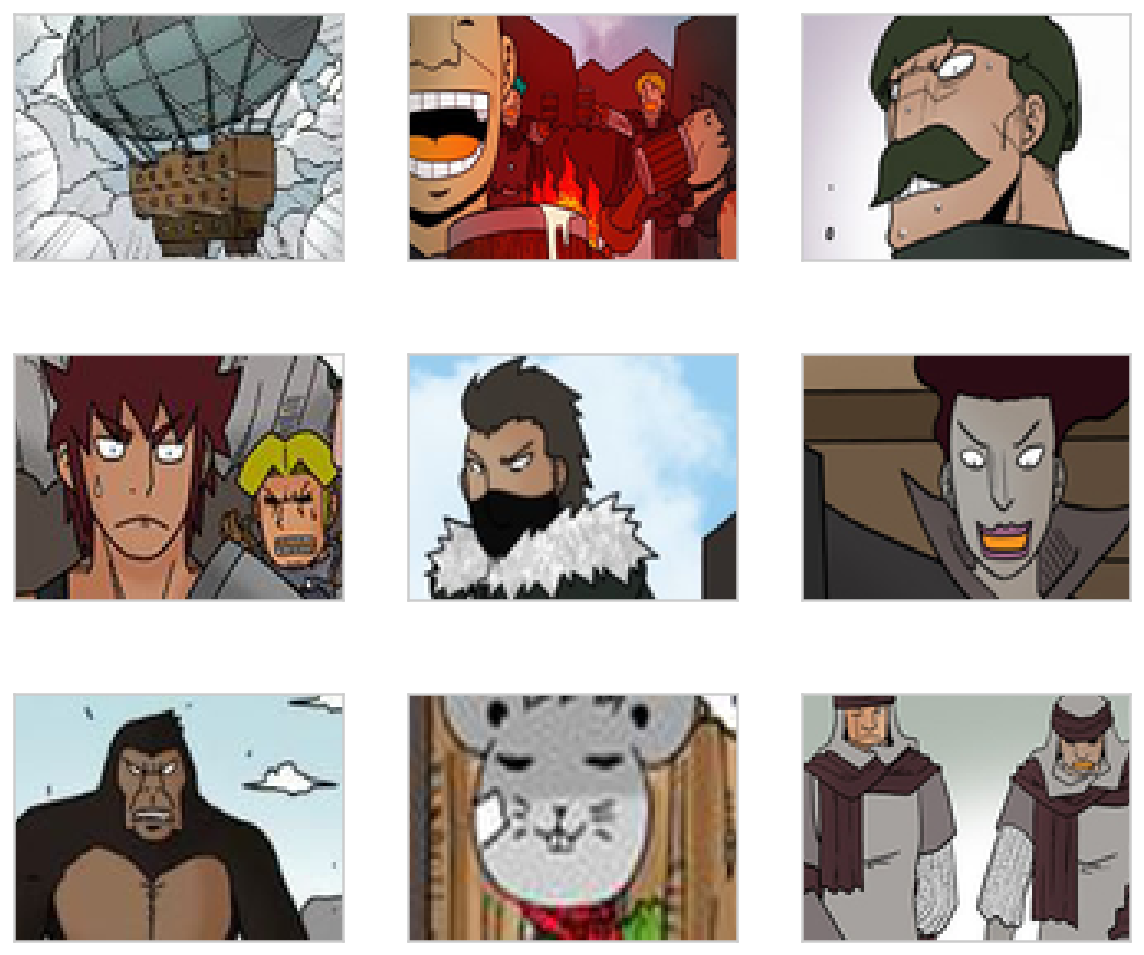

히어로메이커, 빤쓰


In [162]:
# 5번째 이미지 proba기준 1위 웹툰 이미지 10개 가져오기------------

# 비교용으로 넣은 테스트 이미지 
# X_test
test_img = pil.open(v_dir_ls[find_i]).resize((100,75))

real_id = result_df.id[find_i]
# real_id

plt.figure(figsize=(3, 3))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = 'input image'
plt.title(info2)
clear_output()
# plt.show()

i = 0

plt.figure(figsize=(10,12))
for each_path in first_10[:9]:   
  # fig = plt.figure()
  plt.subplot(4, 3, i + 1)  
  picture = pil.open(each_path).resize((100,75), pil.ANTIALIAS)
  plt.imshow(picture)
  plt.grid(False)
  # plt.subplots_adjust(hspace=0.4, wspace=0.2)
  plt.xticks([])
  plt.yticks([])
  i += 1

clear_output()

plt.show()
print(first_10[0].split('/')[-1].split('_')[0])

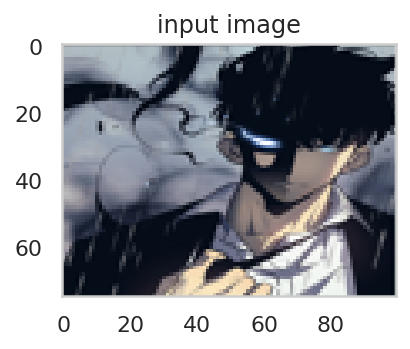

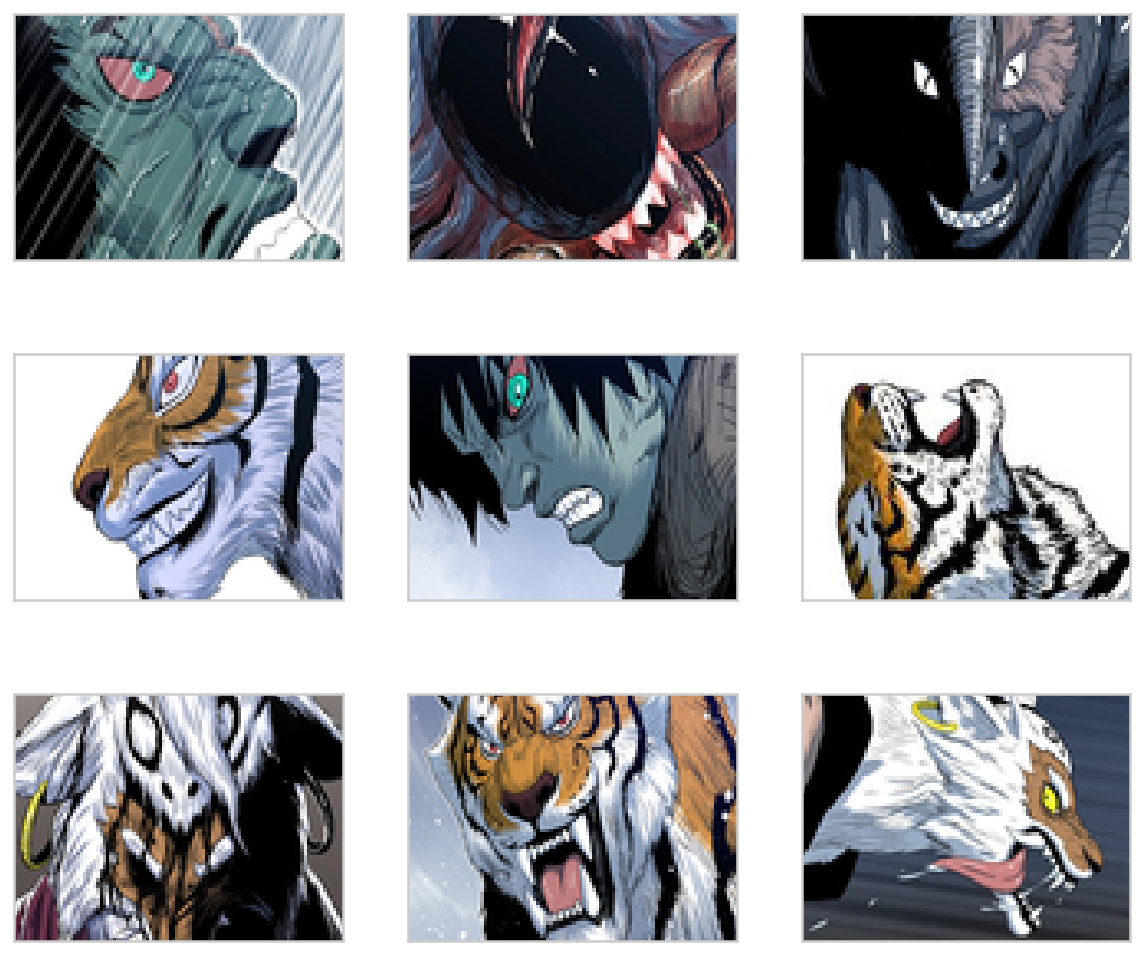

호랑이형님, 이상규


In [172]:
# 6번째 이미지 proba기준 1위 웹툰 이미지 10개 가져오기------------

# 비교용으로 넣은 테스트 이미지 
# X_test
test_img = pil.open(v_dir_ls[find_i]).resize((100,75))

real_id = result_df.id[find_i]
# real_id

plt.figure(figsize=(3, 3))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = 'input image'
plt.title(info2)
clear_output()
# plt.show()

i = 0

plt.figure(figsize=(10,12))
for each_path in first_10[:9]:   
  # fig = plt.figure()
  plt.subplot(4, 3, i + 1)  
  picture = pil.open(each_path).resize((100,75), pil.ANTIALIAS)
  plt.imshow(picture)
  plt.grid(False)
  # plt.subplots_adjust(hspace=0.4, wspace=0.2)
  plt.xticks([])
  plt.yticks([])
  i += 1

clear_output()

plt.show()
print(first_10[0].split('/')[-1].split('_')[0])

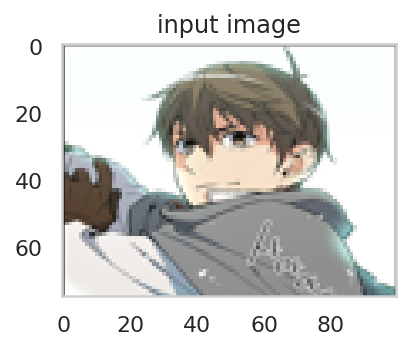

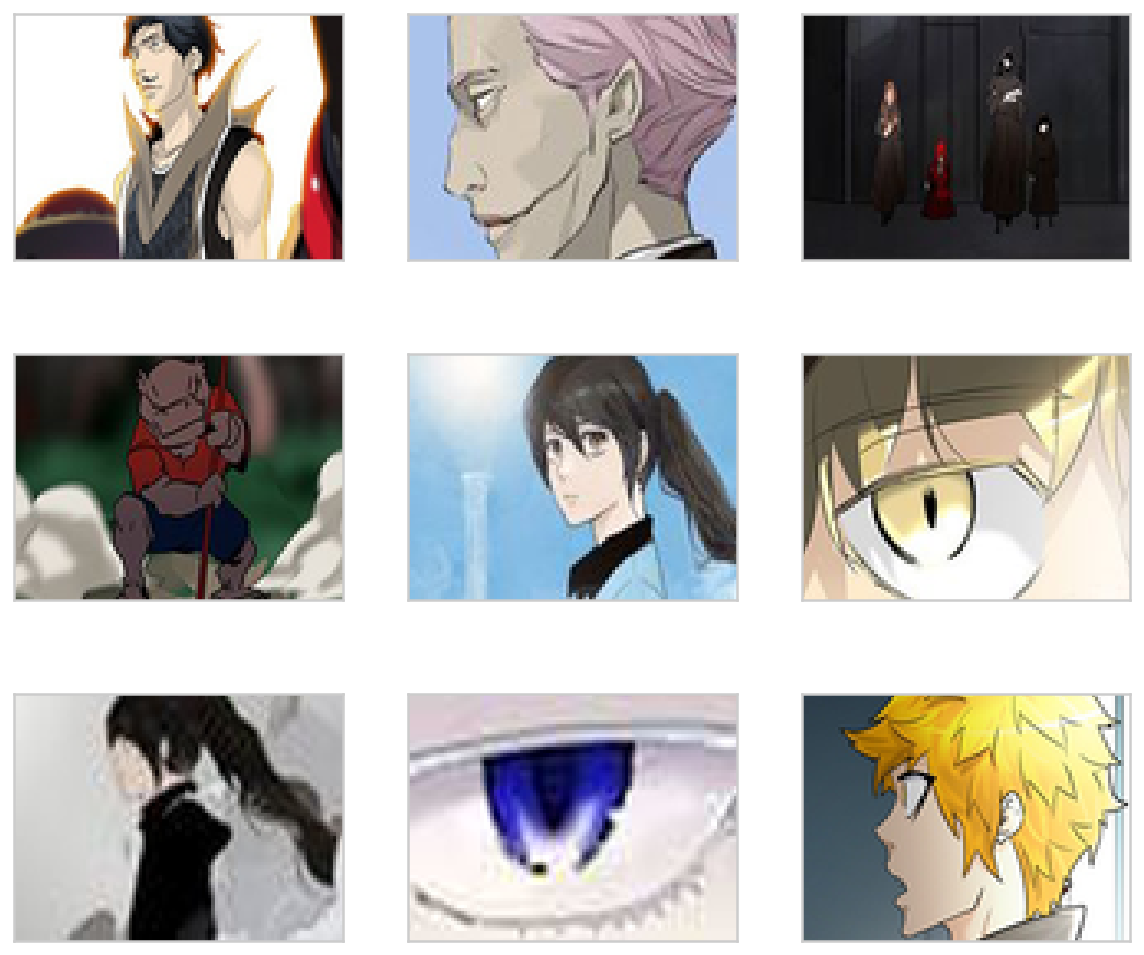

신의 탑, SIU


In [182]:
# 7번째 이미지 proba기준 1위 웹툰 이미지 10개 가져오기------------

# 비교용으로 넣은 테스트 이미지 
# X_test
test_img = pil.open(v_dir_ls[find_i]).resize((100,75))

real_id = result_df.id[find_i]
# real_id

plt.figure(figsize=(3, 3))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = 'input image'
plt.title(info2)
clear_output()
# plt.show()

i = 0

plt.figure(figsize=(10,12))
for each_path in first_10[:9]:   
  # fig = plt.figure()
  plt.subplot(4, 3, i + 1)  
  picture = pil.open(each_path).resize((100,75), pil.ANTIALIAS)
  plt.imshow(picture)
  plt.grid(False)
  # plt.subplots_adjust(hspace=0.4, wspace=0.2)
  plt.xticks([])
  plt.yticks([])
  i += 1

clear_output()

plt.show()
print(first_10[0].split('/')[-1].split('_')[0])

**비슷한가요?**
**코드 작성에 도움을 주신 [brightscannon](https://github.com/brightscannon/Webtoon_recommand_system/blob/master/03_2_Naver_image_CNN_similarity_final.ipynb)님 감사합니다!**